# Лабораторная работа №1

## Предметная область
Датасет содержит информацию о различных харакетристиках воды в водоемах, чтобы понять уровень ее загрязнения и пригодности для потребления.

## Источник и характер данных
https://www.kaggle.com/datasets/adityakadiwal/water-potability

Данные являются имитационными.

## Описание атрибутов
1. ph - мера активности ионов водорода в воде
2. Hardness - плотность воды
3. Solids - количество твердых частиц в воде (миллиграмм на литр)
4. Chloramines - количество хлораминов в воде (миллиграмм на литр)
5. Sulfate - количество сульфате в воде (миллиграмм на литр)
6. Conductivity - электрическая проводимость воды
7. Organic_carbon - количество природного газа в воде (миллиграмм на литр)
8. Trihalomethanes - количество тригалометанов в воде (миллиграмм на литр)
9. Turbidty - мутность воды
10. Potability - пригодность для питья

Тип данных во всех атрибутах - числовой.
## Анализ данных
Задачей анализа является предсказание пригодности воды для питья

Выведем датасет:

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline

df = pd.read_csv("./water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Проверим наличие пропущенных значений и удалим их:

In [90]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [92]:
df = df.dropna()

In [94]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


## Нахождение СКО, нахождение среднего значения

In [97]:
means = df.mean()
std_devs = df.std()

print("Средние значения:")
print(means)
print("\nСтандартные отклонения:")
print(std_devs)

Средние значения:
ph                     7.085990
Hardness             195.968072
Solids             21917.441374
Chloramines            7.134338
Sulfate              333.224672
Conductivity         426.526409
Organic_carbon        14.357709
Trihalomethanes       66.400859
Turbidity              3.969729
Potability             0.403282
dtype: float64

Стандартные отклонения:
ph                    1.573337
Hardness             32.635085
Solids             8642.239815
Chloramines           1.584820
Sulfate              41.205172
Conductivity         80.712572
Organic_carbon        3.324959
Trihalomethanes      16.077109
Turbidity             0.780346
Potability            0.490678
dtype: float64


## Построение гистограмм распределения значений и определение выбросов

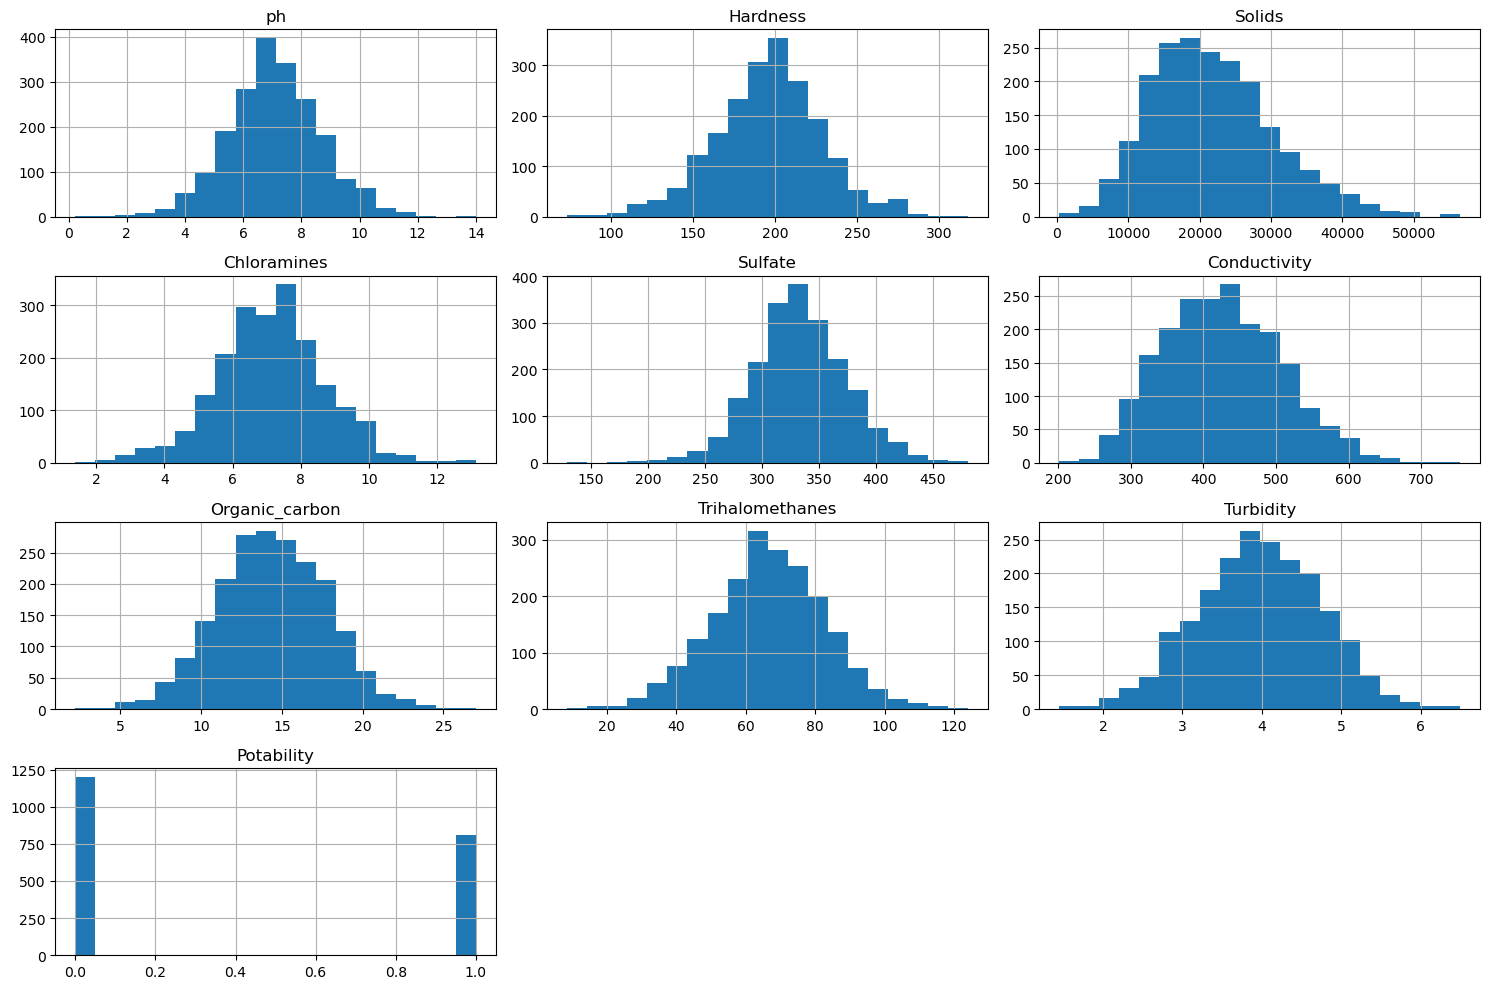

In [100]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

Теперь определим наличие выбросов:

In [103]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    print(f"Колонка {col} - {outliers_count} выбросов")

Колонка ph - 31 выбросов
Колонка Hardness - 49 выбросов
Колонка Solids - 28 выбросов
Колонка Chloramines - 43 выбросов
Колонка Sulfate - 37 выбросов
Колонка Conductivity - 7 выбросов
Колонка Organic_carbon - 14 выбросов
Колонка Trihalomethanes - 22 выбросов
Колонка Turbidity - 11 выбросов
Колонка Potability - 0 выбросов


Выбросы присутствуют.

## Определение корреляции между параметрами
Построим матрицу графиков рассеивания:

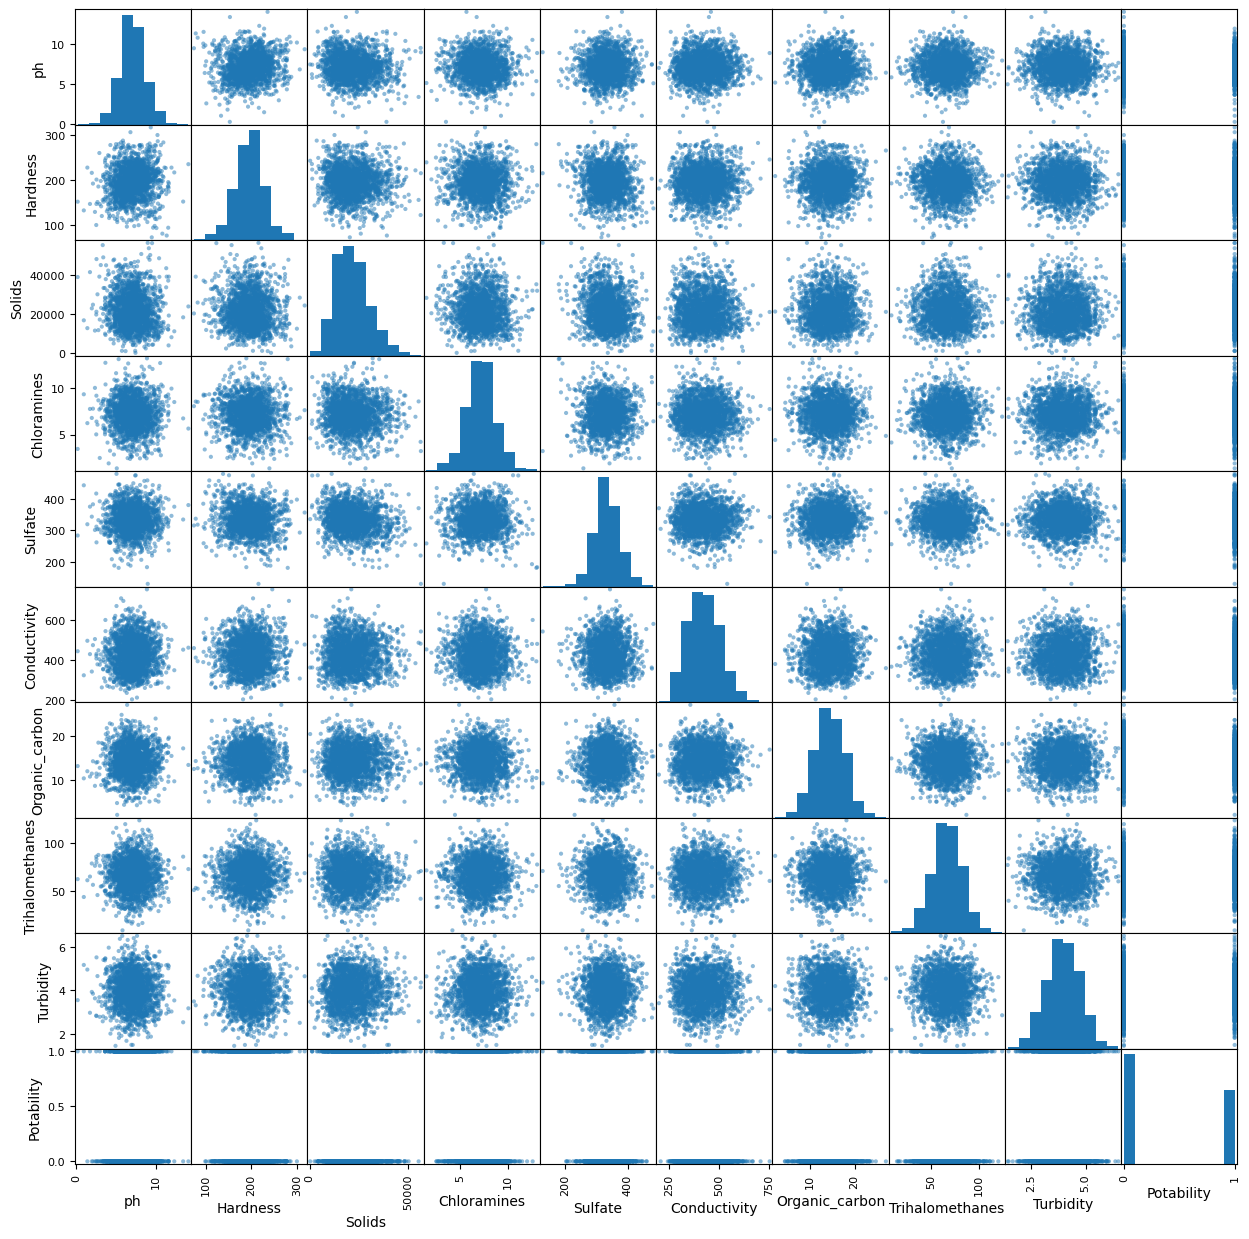

In [107]:
frame = pd.DataFrame(df)
scatter_matrix = pd.plotting.scatter_matrix(frame, figsize=(15, 15))

Построим матрицу корреляций:

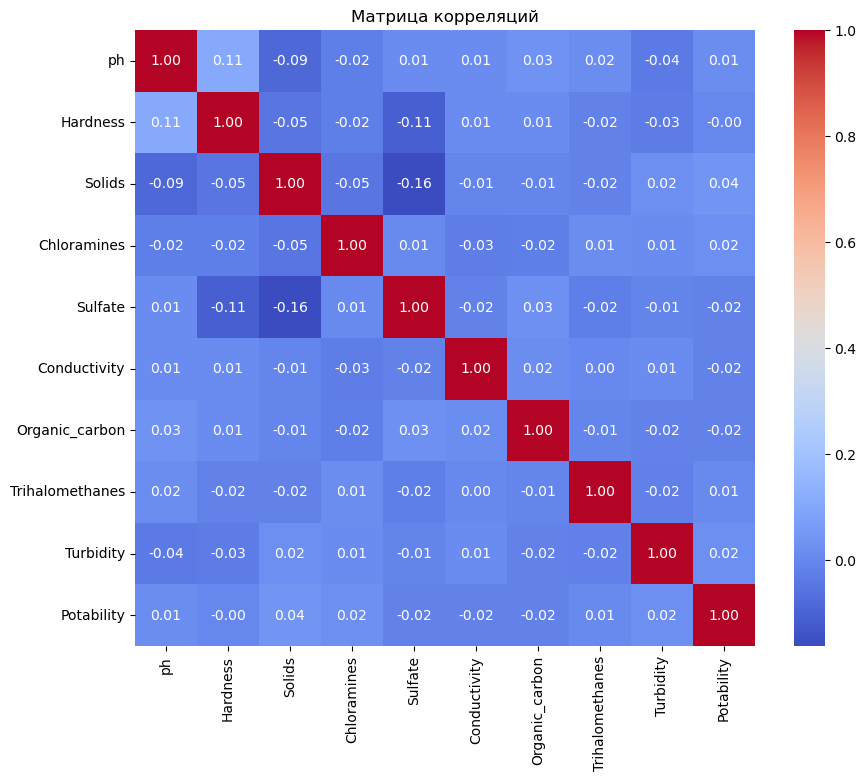

In [110]:
c = pd.DataFrame(df)
correlation_matrix = c.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Матрица корреляций')
plt.show()

## Анализ полученных результатов

Как можно заметить по матрице корреляций, корреляций между почти всеми атрибутами нет (она меньше 0.1 по модулю). Такое может быть, так как в реальности, например, одна характеристика воды никак не зависит от другой (условно, количество природного газа от количества тригалометанов).

Но при этом имеется низкая обратная корреляция между такими атрибутами (0.1 < abs(corr) < 0.3), как количество твердых частиц в воде и количество сульфатов в воде (-0.16), а также между плотностью воды и количества сульфатов в ней (-0.11).